In [29]:
import numpy as np
import pandas as pd
import os
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import datetime
import xgboost as xgb
import matplotlib.pyplot as plt

Import dataframes and examine them.

In [30]:
mathdf = pd.read_csv('SBSA_math.csv')
mathdf.head()

,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular","Students Per Teacher, Special","Students Per Specialist, Instructional",Students Per Assistant Superintendent,Students Per Administrative Assistant,"Students Per Supervisor, Pupil Support",Students Per Crafts & Trades,...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
0,59.75,NaN,699.0,19.971429,116.500000,699.0,NaN,NaN,NaN,NaN,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
1,65.12,NaN,436.0,16.769231,145.333333,436.0,NaN,NaN,NaN,NaN,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
2,57.60,NaN,442.0,17.680000,55.250000,NaN,NaN,NaN,NaN,NaN,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN
3,68.15,NaN,495.0,19.800000,123.750000,495.0,NaN,NaN,NaN,NaN,...,495.0,NaN,495.0,495.0,495.0,495.0,495.0,NaN,NaN,NaN
4,56.66,NaN,542.0,19.357143,180.666667,NaN,NaN,NaN,NaN,NaN,...,542.0,NaN,542.0,542.0,NaN,542.0,NaN,NaN,NaN,NaN


In [31]:
eladf = pd.read_csv('SBSA_ela.csv')
eladf.head()

,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular","Students Per Teacher, Special","Students Per Specialist, Instructional",Students Per Assistant Superintendent,Students Per Administrative Assistant,"Students Per Supervisor, Pupil Support",Students Per Crafts & Trades,...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
0,69.06,NaN,699.0,19.971429,116.500000,699.0,NaN,NaN,NaN,NaN,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
1,80.84,NaN,436.0,16.769231,145.333333,436.0,NaN,NaN,NaN,NaN,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
2,63.08,NaN,442.0,17.680000,55.250000,NaN,NaN,NaN,NaN,NaN,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN
3,75.00,NaN,495.0,19.800000,123.750000,495.0,NaN,NaN,NaN,NaN,...,495.0,NaN,495.0,495.0,495.0,495.0,495.0,NaN,NaN,NaN
4,73.04,NaN,542.0,19.357143,180.666667,NaN,NaN,NaN,NaN,NaN,...,542.0,NaN,542.0,542.0,NaN,542.0,NaN,NaN,NaN,NaN


In [32]:
mathdf.dtypes

PctProficient                                float64
ScaleScoreAvg                                float64
FallEnrollment                               float64
Students Per Teacher, Regular                float64
Students Per Teacher, Special                float64
Students Per Specialist, Instructional       float64
Students Per Assistant Superintendent        float64
Students Per Administrative Assistant        float64
Students Per Supervisor, Pupil Support       float64
Students Per Crafts & Trades                 float64
Students Per Technical                       float64
Students Per Supervisor, General Support     float64
Students Per Custodial                       float64
Students Per Managerial                      float64
Students Per Director                        float64
Students Per Supervisor, Instructional       float64
Students Per Secretarial                     float64
Students Per Superintendent                  float64
Students Per Cafeteria Worker                f

In [33]:
eladf.dtypes

PctProficient                                float64
ScaleScoreAvg                                float64
FallEnrollment                               float64
Students Per Teacher, Regular                float64
Students Per Teacher, Special                float64
Students Per Specialist, Instructional       float64
Students Per Assistant Superintendent        float64
Students Per Administrative Assistant        float64
Students Per Supervisor, Pupil Support       float64
Students Per Crafts & Trades                 float64
Students Per Technical                       float64
Students Per Supervisor, General Support     float64
Students Per Custodial                       float64
Students Per Managerial                      float64
Students Per Director                        float64
Students Per Supervisor, Instructional       float64
Students Per Secretarial                     float64
Students Per Superintendent                  float64
Students Per Cafeteria Worker                f

Both dataframes only have numerical columns, there are no categorical columns. Most of the columns are the engineered 'student per staff' made in part 1

In [34]:
mathdf.shape

(818, 37)

Going to find the percentage of data for each column, and I'm going to throw away the columns that are more than 90% null.

In [35]:
1 - mathdf.isnull().sum().sort_values(ascending=False) / 818

Students Per Psychometrist                   0.000000
Students Per Assistant Superintendent        0.001222
Students Per Superintendent                  0.018337
Students Per Supervisor, Pupil Support       0.022005
Students Per Administrative Assistant        0.026895
Students Per Home Visitor                    0.034230
Students Per Supervisor, Instructional       0.041565
Students Per Specialist, General Support     0.056235
Students Per Technical                       0.081907
Students Per Supervisor, General Support     0.081907
Students Per Social Worker                   0.094132
Students Per Other Pupil Support             0.100244
Students Per Director                        0.107579
Students Per Bus Driver & Laborer            0.111247
Students Per Other General Support           0.116137
Students Per Crafts & Trades                 0.143032
Students Per Service Aide                    0.265281
Students Per Speech and Hearing Therapist    0.369193
Students Per Specialist, Ins

In [36]:
mathdf = mathdf.drop(columns=['Students Per Psychometrist', 'Students Per Assistant Superintendent', 'Students Per Administrative Assistant', 'Students Per Superintendent',\
    'Students Per Supervisor, Pupil Support', 'Students Per Home Visitor', 'Students Per Supervisor, Instructional', 'Students Per Specialist, General Support',\
        'Students Per Social Worker'], axis=1)

In [37]:
eladf.shape

(1146, 37)

In [38]:
1 - eladf.isnull().sum().sort_values(ascending=False) / 1146

Students Per Psychometrist                   0.000000
Students Per Assistant Superintendent        0.000873
Students Per Superintendent                  0.014834
Students Per Supervisor, Pupil Support       0.022688
Students Per Administrative Assistant        0.029668
Students Per Home Visitor                    0.035777
Students Per Supervisor, Instructional       0.044503
Students Per Specialist, General Support     0.056719
Students Per Supervisor, General Support     0.076789
Students Per Social Worker                   0.082024
Students Per Technical                       0.091623
Students Per Other Pupil Support             0.094241
Students Per Other General Support           0.109075
Students Per Bus Driver & Laborer            0.110820
Students Per Director                        0.111693
Students Per Crafts & Trades                 0.137871
Students Per Service Aide                    0.283595
Students Per Speech and Hearing Therapist    0.344677
Students Per Specialist, Ins

In [39]:
eladf = eladf.drop(columns=['Students Per Psychometrist', 'Students Per Assistant Superintendent', 'Students Per Administrative Assistant', 'Students Per Superintendent',\
    'Students Per Supervisor, Pupil Support', 'Students Per Home Visitor', 'Students Per Supervisor, Instructional', 'Students Per Specialist, General Support',\
        'Students Per Supervisor, General Support', 'Students Per Social Worker', 'Students Per Technical', 'Students Per Other Pupil Support'], axis=1)

Insert the mean value for each column and then use the minmax scaler to scale each column.

In [40]:
mathdfcolumns = mathdf.columns
mimputer = SimpleImputer(strategy='mean')
mathdfimputed = mimputer.fit_transform(mathdf)
mscaler = MinMaxScaler()
mathdfscaledimputed = mscaler.fit_transform(mathdfimputed)
mathdfscaledimputed = pd.DataFrame(mathdfscaledimputed, columns=mathdfcolumns)
mathdfscaledimputed

,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular","Students Per Teacher, Special","Students Per Specialist, Instructional",Students Per Crafts & Trades,Students Per Technical,"Students Per Supervisor, General Support",Students Per Custodial,...,"Students Per Specialist, Pupil Support",Students Per Teaching & Clerical Aide,Students Per Nurse,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support
0,0.614020,0.409970,0.255607,0.157554,0.109656,0.293977,0.414142,0.325079,0.281304,0.102044,...,0.234938,0.054976,0.205753,0.290664,0.672887,0.318685,0.200076,0.188787,0.250633,0.268713
1,0.670714,0.409970,0.144308,0.115702,0.141020,0.168004,0.414142,0.325079,0.281304,0.074962,...,0.234938,0.039674,0.153836,0.164100,0.384193,0.253150,0.103326,0.188787,0.250633,0.268713
2,0.591322,0.409970,0.146847,0.127605,0.043030,0.220142,0.414142,0.325079,0.281304,0.076281,...,0.234938,0.027110,0.107191,0.166987,0.390779,0.258191,0.105987,0.188787,0.250633,0.268713
3,0.702703,0.409970,0.169276,0.155314,0.117542,0.196264,0.414142,0.325079,0.281304,0.124203,...,0.234938,0.058762,0.127517,0.192493,0.448957,0.302716,0.129490,0.216385,0.250633,0.268713
4,0.581398,0.409970,0.189166,0.149525,0.179455,0.220142,0.414142,0.325079,0.281304,0.074434,...,0.234938,0.064899,0.145542,0.215111,0.500549,0.318685,0.150333,0.188787,0.250633,0.268713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0.132812,0.152519,0.219213,0.125440,0.149632,0.220142,0.414142,0.325079,0.179635,0.158789,...,0.270355,0.026147,0.172771,0.246644,0.389161,0.318685,0.200076,0.188787,0.023409,0.048659
814,0.435705,0.513250,0.213711,0.134164,0.103943,0.220142,0.346518,0.325079,0.281304,0.094257,...,0.106994,0.058669,0.052733,0.243022,0.389161,0.318685,0.176053,0.188787,0.250633,0.268713
815,0.435705,0.513250,0.213711,0.134164,0.103943,0.220142,0.346518,0.325079,0.281304,0.094257,...,0.106994,0.058669,0.052733,0.243022,0.389161,0.318685,0.176053,0.188787,0.250633,0.268713
816,0.180532,0.078510,0.104105,0.214875,0.168396,0.000000,0.414142,0.325079,0.281304,0.278962,...,0.234938,0.058669,0.068456,0.246644,0.389161,0.318685,0.200076,0.188787,0.250633,0.144920


In [41]:
eladfcolumns = eladf.columns
eimputer = SimpleImputer(strategy='mean')
eladfimputed = eimputer.fit_transform(eladf)
escaler = MinMaxScaler()
eladfscaledimputed = escaler.fit_transform(eladfimputed)
eladfscaledimputed = pd.DataFrame(eladfscaledimputed, columns=eladfcolumns)
eladfscaledimputed

,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular","Students Per Teacher, Special","Students Per Specialist, Instructional",Students Per Crafts & Trades,Students Per Custodial,Students Per Managerial,Students Per Director,...,"Students Per Specialist, Pupil Support",Students Per Teaching & Clerical Aide,Students Per Nurse,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support
0,0.692474,0.421450,0.255607,0.127227,0.121141,0.293977,0.406648,0.109123,0.206261,0.278731,...,0.246239,0.059245,0.223472,0.295916,0.684048,0.342535,0.197276,0.184304,0.242758,0.312072
1,0.819674,0.421450,0.144308,0.093431,0.152101,0.168004,0.406648,0.082253,0.187462,0.278731,...,0.246239,0.044012,0.170317,0.170289,0.413379,0.285748,0.108859,0.184304,0.242758,0.312072
2,0.627902,0.421450,0.146847,0.103043,0.055374,0.214363,0.406648,0.083562,0.118497,0.278731,...,0.246239,0.031504,0.127109,0.173155,0.419554,0.290017,0.111503,0.184304,0.242758,0.312072
3,0.756614,0.421450,0.169276,0.125418,0.128926,0.196264,0.406648,0.131107,0.136596,0.278731,...,0.246239,0.063014,0.146982,0.198471,0.474099,0.327721,0.134861,0.220405,0.242758,0.312072
4,0.735450,0.421450,0.189166,0.120744,0.190040,0.214363,0.406648,0.081730,0.152647,0.278731,...,0.246239,0.069123,0.164604,0.220922,0.522470,0.342535,0.155575,0.184304,0.242758,0.312072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,0.306662,0.479667,0.080406,0.074758,0.072554,0.027422,0.406648,0.100312,0.187462,0.054977,...,0.009826,0.048067,0.068241,0.007404,0.257976,0.043159,0.197276,0.184304,0.242758,0.312072
1142,0.069431,0.337831,0.172662,0.087695,0.536143,0.214363,0.406648,0.100312,0.187462,0.074149,...,0.246239,0.064054,0.149981,0.202293,0.223499,0.342535,0.197276,0.224122,0.242758,0.312072
1143,0.069431,0.337831,0.172662,0.087695,0.536143,0.214363,0.406648,0.100312,0.187462,0.074149,...,0.246239,0.064054,0.149981,0.202293,0.223499,0.342535,0.197276,0.224122,0.242758,0.312072
1144,0.253860,0.158979,0.104105,0.173514,0.179123,0.000000,0.406648,0.284646,0.187462,0.206196,...,0.246239,0.060489,0.089239,0.248125,0.423615,0.342535,0.197276,0.184304,0.242758,0.192282


Split data into training and testing sets.

In [42]:
X_trainm, X_testm, y_trainm, y_testm = train_test_split(mathdfscaledimputed.drop(columns=['PctProficient','ScaleScoreAvg','FallEnrollment']), mathdfscaledimputed.PctProficient, test_size=0.25, random_state=47)

In [43]:
X_traine, X_teste, y_traine, y_teste = train_test_split(eladfscaledimputed.drop(columns=['PctProficient','ScaleScoreAvg','FallEnrollment']), eladfscaledimputed.PctProficient, test_size=0.25, random_state=47)

First of all, I am going to run a pipeline with the different regression models and see which of them perform the best on the math data set. There will be 5 fold cross validation on each model but no hyperparameter tuning.

In [44]:
models = {"Linear": LinearRegression(), "Ridge": Ridge(), "Lasso": Lasso(), "RForest": RandomForestRegressor(), "SVM": SVR(), \
    "KNR": KNeighborsRegressor(), "SGD": SGDRegressor(), "AdaBoost" : AdaBoostRegressor(), "GBoost" : GradientBoostingRegressor(), "XGBoost": xgb.XGBRegressor()}



In [45]:
resultsm = []

for model in models.values():

    pipe = make_pipeline(
        model
    )

    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_scores = cross_val_score(pipe, X_trainm, y_trainm, cv=kf)

    resultsm.append(cv_scores)

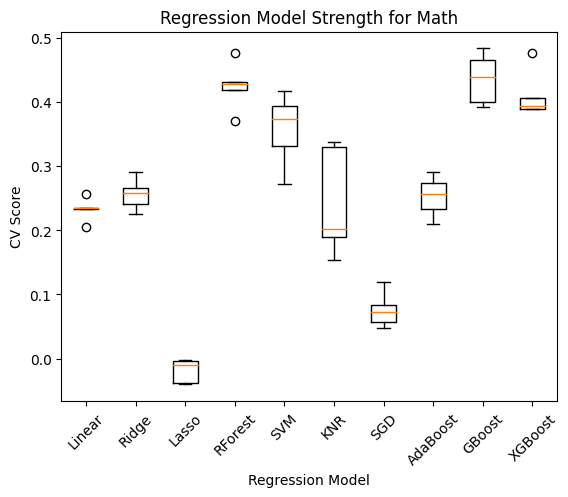

In [46]:
plt.boxplot(resultsm, labels=models.keys())
plt.title("Regression Model Strength for Math")
plt.ylabel("CV Score")
plt.xlabel("Regression Model")
plt.xticks(rotation=45)
plt.show()

Interesting, it would appear that Random Forest Regression, Gradient Boosting and XGBoost are the best for math, let's move on and try it with the English language arts data set.

In [47]:
resultse = []

for model in models.values():

    pipe = make_pipeline(
        model
    )

    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_scores = cross_val_score(pipe, X_traine, y_traine, cv=kf)

    resultse.append(cv_scores)

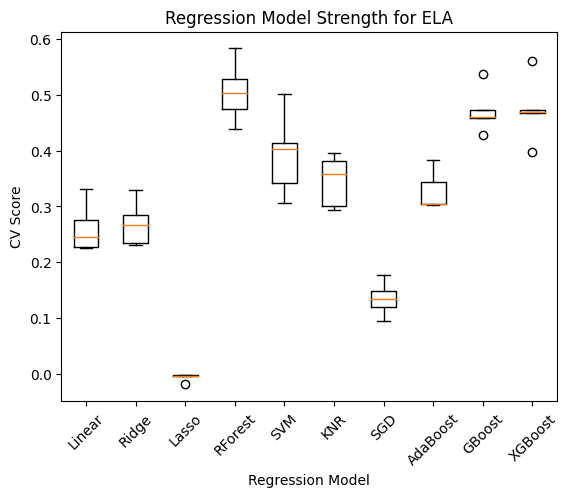

In [48]:
plt.boxplot(resultse, labels=models.keys())
plt.title("Regression Model Strength for ELA")
plt.ylabel("CV Score")
plt.xlabel("Regression Model")
plt.xticks(rotation=45)
plt.show()

The same three models performed well again. I am going to pick random forest and xgboost for my testing. I have been impressed by the xgboost performance in other examples, and it seems to be doing well here as well. Random Forest is also performing well, let's start with random forest and do some hyperparameter tuning.

In [49]:
RF_pipe_math = make_pipeline(
    RandomForestRegressor(random_state=47)
)

In [50]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]

grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'randomforestregressor__max_features' : ['sqrt', 'log2']
}

In [51]:
rf_grid_cvm = GridSearchCV(RF_pipe_math, param_grid=grid_params, cv=5, n_jobs=-1)
rf_grid_cvm.fit(X_trainm, y_trainm)
rf_grid_cvm.best_params_

{'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__n_estimators': 615}

It appears that random forest works best on the math data set with 615 estimators.

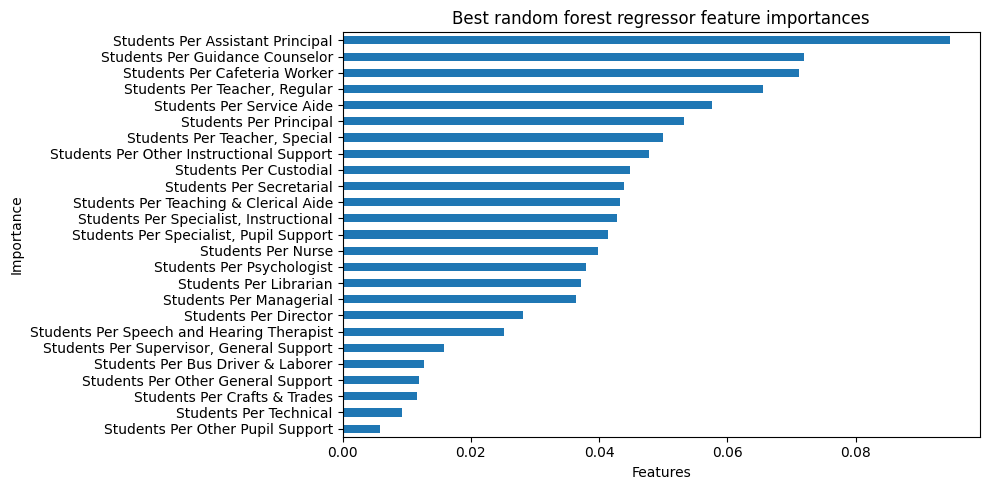

In [52]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cvm.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_trainm.columns).sort_values(ascending=True)
rf_feat_imps.plot(kind='barh')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best random forest regressor feature importances')
plt.tight_layout()

Looks like Students Per Assistant Principal is the key feature here, but students per teacher also rate quite highly. None of the features seem particularly prominent though.

In [53]:
y_predm = rf_grid_cvm.best_estimator_.predict(X_testm)

print(mean_squared_error(y_testm, y_predm))
print(mean_absolute_error(y_testm, y_predm))
print(rf_grid_cvm.score(X_testm, y_testm))

0.019807716486995943
0.11226764856021987
0.5338140464306844


An R-squared value of .53 seems pretty good as far as predicting human behavior goes. I would like the mean absolute error to come down from .11 however. Let's do the same with the ELA dataset.

In [54]:
RF_pipe_ela = make_pipeline(
    RandomForestRegressor(random_state=47)
)

In [55]:
rf_grid_cve = GridSearchCV(RF_pipe_ela, param_grid=grid_params, cv=5, n_jobs=-1)
rf_grid_cve.fit(X_traine, y_traine)
rf_grid_cve.best_params_

{'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__n_estimators': 183}

Interestingly this model works better with much fewer estimators, 183.

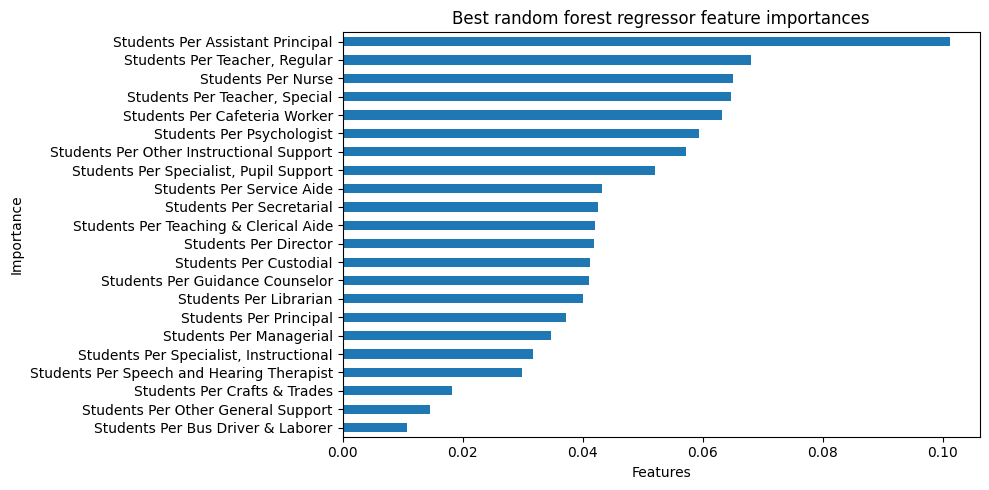

In [56]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cve.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_traine.columns).sort_values(ascending=True)
rf_feat_imps.plot(kind='barh')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best random forest regressor feature importances')
plt.tight_layout()

Again, Students Per Assistant Principal really stands out here as important.

In [57]:
y_prede = rf_grid_cve.best_estimator_.predict(X_teste)

print(mean_squared_error(y_teste, y_prede))
print(mean_absolute_error(y_teste, y_prede))
print(rf_grid_cve.score(X_teste, y_teste))

0.015830851336926022
0.09995984329516218
0.6217645527538381


Much better scores here in ELA than in the prior math model. I thought that may be possible because the ELA proficiency scores are normally distributed while the math ones are not. Let's move on to xgboost with the math data set.

In [58]:
xgbmodelm = xgb.XGBRegressor()

In [59]:
grid_params = {
    'learning_rate' : (0.05, 0.10, 0.15, 0.2, 0.25, 0.3),
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

In [60]:
xgb_grid_cvm = GridSearchCV(xgbmodelm, param_grid=grid_params, cv=5, n_jobs=-1)
xgb_grid_cvm.fit(X_trainm, y_trainm)
print(xgb_grid_cvm.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


100 estimators and a learning rate of 0.1 are the hyperparameters for the math data set.

In [61]:
y_predm = xgb_grid_cvm.best_estimator_.predict(X_testm)

print(mean_squared_error(y_testm, y_predm))
print(mean_absolute_error(y_testm, y_predm))
print(xgb_grid_cvm.score(X_testm, y_testm))

0.019669061088420786
0.10904845045627774
0.5370773806592781


Slightly better scores than the random forest model of math scores, but the scores are close enough that I think it is just random chance that these scores are better.

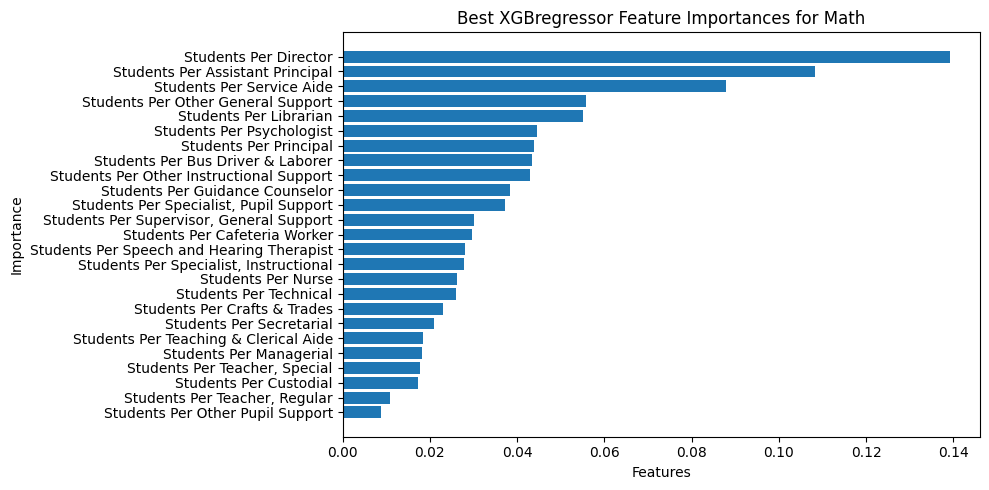

In [62]:
sorted_index = xgb_grid_cvm.best_estimator_.feature_importances_.argsort()

plt.subplots(figsize=(10, 5))
plt.barh(X_trainm.columns[sorted_index], xgb_grid_cvm.best_estimator_.feature_importances_[sorted_index])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best XGBregressor Feature Importances for Math')
plt.tight_layout()

Now Students per Director really stands out, but yet again Students Per Assistant Principal is very important. Not only that the top features show greater relative importance here than in the random forest model. Let's move on to ELA.

In [63]:
xgbmodele = xgb.XGBRegressor()

In [64]:
xgb_grid_cve = GridSearchCV(xgbmodele, param_grid=grid_params, cv=5, n_jobs=-1)
xgb_grid_cve.fit(X_traine, y_traine)
print(xgb_grid_cve.best_params_)

{'learning_rate': 0.05, 'n_estimators': 700}


Many more estimators this time, with 700, and a learning rate of 0.05

In [65]:
y_prede = xgb_grid_cve.best_estimator_.predict(X_teste)

print(mean_squared_error(y_teste, y_prede))
print(mean_absolute_error(y_teste, y_prede))
print(xgb_grid_cve.score(X_teste, y_teste))

0.015564959952972886
0.09441108963037546
0.6281173094305327


Scores that are once again similar to the random forest model, it seems like we cannot use these scores alone to make our choice.

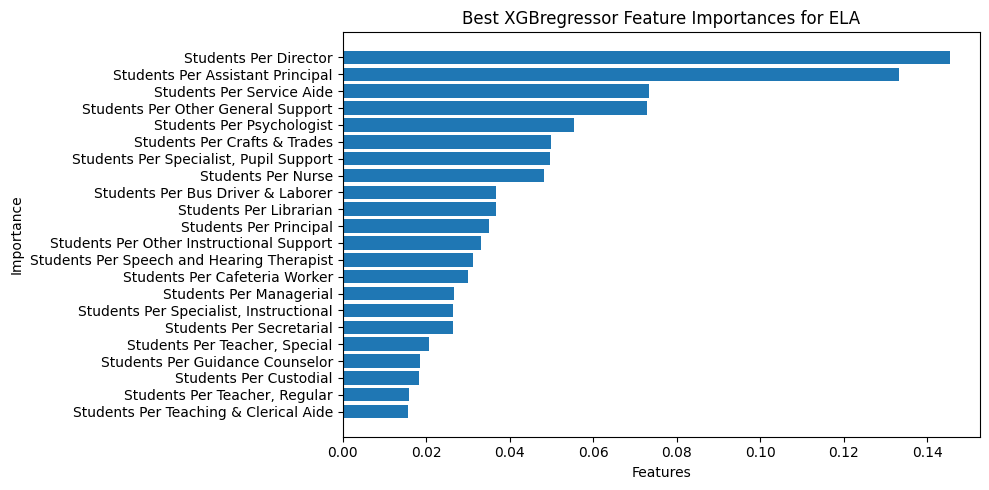

In [66]:
sorted_index = xgb_grid_cve.best_estimator_.feature_importances_.argsort()

plt.subplots(figsize=(10, 5))
plt.barh(X_traine.columns[sorted_index], xgb_grid_cve.best_estimator_.feature_importances_[sorted_index])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best XGBregressor Feature Importances for ELA')
plt.tight_layout()

Same two features rate as most important here. For a final decision I have decided to save the xgboost models. They took slightly longer to train, but the difference is very managable. Most importantly the important features on the xgboost model are relatively more important than those on the random forest model. For that reason I have chosen the xgboost regression model.

In [67]:
best_modelm = xgb_grid_cvm.best_estimator_
best_modelm.version = '1.0'
best_modelm.pandas_version = pd.__version__
best_modelm.numpy_version = np.__version__
best_modelm.sklearn_version = sklearn_version
best_modelm.X_columns = [col for col in X_trainm.columns]
best_modelm.build_datetime = datetime.datetime.now()

In [68]:
with open('./xgboostmath.pkl', 'wb') as f:
    pickle.dump(best_modelm, f)

In [69]:
best_modele = xgb_grid_cve.best_estimator_
best_modele.version = '1.0'
best_modele.pandas_version = pd.__version__
best_modele.numpy_version = np.__version__
best_modele.sklearn_version = sklearn_version
best_modele.X_columns = [col for col in X_traine.columns]
best_modele.build_datetime = datetime.datetime.now()

In [70]:
with open('./xgboostela.pkl', 'wb') as f:
    pickle.dump(best_modele, f)